In [23]:
import numpy as np
import numpy.linalg as lina
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA as SKPCA

In [2]:
from skimage import io as skio

In [3]:
red=skio.imread("_Tif/po_221141_red_sub.tif")
red10x10=red[400:410,50:60]
ired=skio.imread("_Tif/po_221141_nir_sub.tif")
ired10x10=ired[400:410,50:60]
gree=skio.imread("_Tif/po_221141_green_sub.tif")
gree10x10=gree[400:410,50:60]



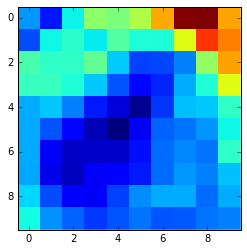

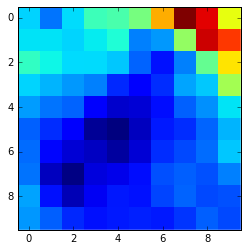

In [4]:
plt.imshow(red10x10,interpolation='none')
plt.show()
plt.imshow(gree10x10,interpolation='none')
plt.show()

In [6]:
print gree10x10, "\n"
print red10x10, "\n"
print ired10x10

[[614 600 615 627 629 637 671 711 698 657]
 [616 616 614 617 622 602 605 642 701 689]
 [625 619 615 615 612 598 586 602 634 662]
 [614 609 605 602 589 583 590 607 612 645]
 [606 600 598 582 575 576 585 597 604 616]
 [597 590 583 568 565 573 587 590 598 609]
 [599 584 576 574 569 576 590 594 599 612]
 [600 573 566 577 579 585 595 597 595 602]
 [607 586 572 580 587 586 593 598 594 595]
 [605 597 589 586 587 588 587 591 597 594]] 

[[580 559 594 619 615 626 652 694 695 653]
 [568 595 600 593 608 597 597 635 672 659]
 [606 601 601 611 588 566 567 576 620 653]
 [602 603 598 587 569 557 562 583 598 635]
 [583 587 576 560 549 539 564 586 587 601]
 [583 569 557 544 536 553 572 574 579 595]
 [583 553 546 547 547 558 573 577 574 601]
 [582 551 545 553 556 560 573 580 576 586]
 [590 568 556 553 566 578 583 583 573 583]
 [596 579 572 565 569 574 569 570 574 576]] 

[[836 792 753 728 718 737 769 794 799 777]
 [789 726 728 725 721 707 684 717 766 758]
 [717 719 717 719 696 667 668 696 736 757]
 [716

In [45]:
Data=np.zeros([100,3])

Data[:,0]=red10x10.reshape(100,1).ravel()
Data[:,1]=ired10x10.reshape(100,1).ravel()
Data[:,2]=gree10x10.reshape(100,1).ravel()

print Data


[[ 580.  836.  614.]
 [ 559.  792.  600.]
 [ 594.  753.  615.]
 [ 619.  728.  627.]
 [ 615.  718.  629.]
 [ 626.  737.  637.]
 [ 652.  769.  671.]
 [ 694.  794.  711.]
 [ 695.  799.  698.]
 [ 653.  777.  657.]
 [ 568.  789.  616.]
 [ 595.  726.  616.]
 [ 600.  728.  614.]
 [ 593.  725.  617.]
 [ 608.  721.  622.]
 [ 597.  707.  602.]
 [ 597.  684.  605.]
 [ 635.  717.  642.]
 [ 672.  766.  701.]
 [ 659.  758.  689.]
 [ 606.  717.  625.]
 [ 601.  719.  619.]
 [ 601.  717.  615.]
 [ 611.  719.  615.]
 [ 588.  696.  612.]
 [ 566.  667.  598.]
 [ 567.  668.  586.]
 [ 576.  696.  602.]
 [ 620.  736.  634.]
 [ 653.  757.  662.]
 [ 602.  716.  614.]
 [ 603.  726.  609.]
 [ 598.  706.  605.]
 [ 587.  672.  602.]
 [ 569.  662.  589.]
 [ 557.  663.  583.]
 [ 562.  672.  590.]
 [ 583.  688.  607.]
 [ 598.  703.  612.]
 [ 635.  735.  645.]
 [ 583.  701.  606.]
 [ 587.  694.  600.]
 [ 576.  681.  598.]
 [ 560.  664.  582.]
 [ 549.  646.  575.]
 [ 539.  657.  576.]
 [ 564.  672.  585.]
 [ 586.  683.

In [46]:
pca = SKPCA(n_components=3)
pca.fit(Data)
print pca.get_covariance()
print(pca.explained_variance_ratio_) 

[[  961.2404   888.7172   842.8738]
 [  888.7172  1414.7896   867.4584]
 [  842.8738   867.4584   785.8011]]
[ 0.8914363   0.10188946  0.00667424]


In [32]:
print np.corrcoef(Data[:,0],Data[:,1])
#print np.corrcoef(Data[:,1],Data[:,2])
#print np.corrcoef(Data[:,0],Data[:,2])

[[ 1.         0.7620819]
 [ 0.7620819  1.       ]]


In [36]:
COV=np.cov(Data[:,0],Data[:,1])
print COV
print COV[0,0]
print COV[1,1]
#print COV[2,2]
print "Sum of Variances: {}".format(COV[0,0]+COV[1,1])
#print "Sum of Variances: {}".format(COV[0,0]+COV[1,1]+COV[2,2])

[[  970.94989899   897.69414141]
 [  897.69414141  1429.08040404]]
970.94989899
1429.08040404
Sum of Variances: 2400.03030303


In [ ]:
plt.plot(Data[:,0],Data[:,1],".r")
plt.show()

In [16]:
print '-------------------------------\n'
print 'Means of data columns \n {}'.format(np.mean(Data,axis=0))
print '-------------------------------\n'

-------------------------------

Means of data columns 
 [ 584.86  696.48  603.67]
-------------------------------



In [37]:
CenterData=Data - np.mean(Data,axis=0 )
print CenterData

[[  -4.86  139.52]
 [ -25.86   95.52]
 [   9.14   56.52]
 [  34.14   31.52]
 [  30.14   21.52]
 [  41.14   40.52]
 [  67.14   72.52]
 [ 109.14   97.52]
 [ 110.14  102.52]
 [  68.14   80.52]
 [ -16.86   92.52]
 [  10.14   29.52]
 [  15.14   31.52]
 [   8.14   28.52]
 [  23.14   24.52]
 [  12.14   10.52]
 [  12.14  -12.48]
 [  50.14   20.52]
 [  87.14   69.52]
 [  74.14   61.52]
 [  21.14   20.52]
 [  16.14   22.52]
 [  16.14   20.52]
 [  26.14   22.52]
 [   3.14   -0.48]
 [ -18.86  -29.48]
 [ -17.86  -28.48]
 [  -8.86   -0.48]
 [  35.14   39.52]
 [  68.14   60.52]
 [  17.14   19.52]
 [  18.14   29.52]
 [  13.14    9.52]
 [   2.14  -24.48]
 [ -15.86  -34.48]
 [ -27.86  -33.48]
 [ -22.86  -24.48]
 [  -1.86   -8.48]
 [  13.14    6.52]
 [  50.14   38.52]
 [  -1.86    4.52]
 [   2.14   -2.48]
 [  -8.86  -15.48]
 [ -24.86  -32.48]
 [ -35.86  -50.48]
 [ -45.86  -39.48]
 [ -20.86  -24.48]
 [   1.14  -13.48]
 [   2.14   -3.48]
 [  16.14   12.52]
 [  -1.86  -15.48]
 [ -15.86  -25.48]
 [ -27.86  -

In [47]:
np.corrcoef(CenterData[:,0],CenterData[:,1])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

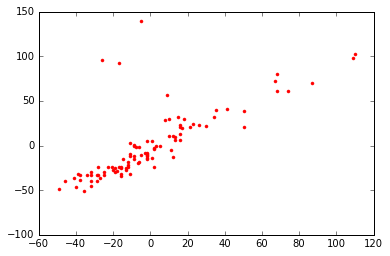

In [39]:
plt.plot(CenterData[:,0],CenterData[:,1], '.r')
plt.show()

In [40]:
U1,s1,V1 = lina.svd(CenterData)

print 'SingularValues \n {}'.format(s1)
print '-------------------------------\n\n'

print 'EigenValues \n {}'.format(s1**2)
print '-------------------------------\n\n'

#print V1
print 'Right Eigenvectors: \n {}'.format(V1)
print '-------------------------------\n\n'
# new observations

SingularValues 
 [ 458.82557472  164.5663756 ]
-------------------------------


EigenValues 
 [ 210520.90802148   27082.09197852]
-------------------------------


Right Eigenvectors: 
 [[ 0.61349482  0.78969875]
 [ 0.78969875 -0.61349482]]
-------------------------------




(100, 2)


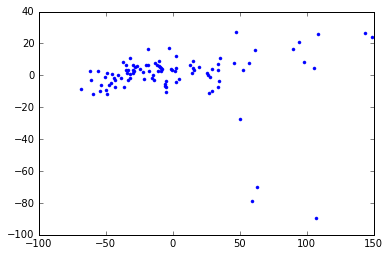

In [41]:
newData=np.dot(CenterData,V1)

print newData.shape
plt.plot(newData[:,0],newData[:,1], '.b')
plt.show()

In [44]:
print np.corrcoef(newData[:,0],newData[:,1]), "\n"

newCOV=np.cov(newData[:,0],newData[:,1])
print newCOV[:3,:3],"\n"
print "Variance of PC1: ",newCOV[0,0]
print "Variance of PC2: ",newCOV[1,1]
#print "Variance of PC3: ",newCOV[2,2]
#print np.trace(newData)
print "Sum of Variances: {} !(compare to Value above before PCA: {} )\n".format(newCOV[0,0]+newCOV[1,1], COV[0,0]+COV[1,1])

print "PC1 explains {:.2f}% of the variance".format(newCOV[0,0]*100.0/(newCOV[0,0]+newCOV[1,1]))
print "PC2 explains {:.2f}% of the variance\n".format(newCOV[1,1]*100.0/(newCOV[0,0]+newCOV[1,1]))



print "newData: \n{}".format(newData)

[[  1.00000000e+00   1.56586676e-16]
 [  1.56586676e-16   1.00000000e+00]] 

[[  2.12647382e+03   1.19428597e-13]
 [  1.19428597e-13   2.73556485e+02]] 

Variance of PC1:  2126.4738184
Variance of PC2:  273.556484632
Sum of Variances: 2400.03030303 !(compare to Value above before PCA: 2400.03030303 )

PC1 explains 88.60% of the variance
PC2 explains 11.40% of the variance

newData: 
[[  1.07197184e+02  -8.94327329e+01]
 [  5.95670481e+01  -7.90226346e+01]
 [  5.02411157e+01  -2.74568806e+01]
 [  4.58360175e+01   7.62295849e+00]
 [  3.54850508e+01   1.05991117e+01]
 [  5.72377700e+01   7.62939634e+00]
 [  9.84589951e+01   8.52972952e+00]
 [  1.43968246e+02   2.63597064e+01]
 [  1.48530235e+02   2.40819310e+01]
 [  1.05390080e+02   4.41146972e+00]
 [  6.27194053e+01  -7.00748614e+01]
 [  2.95327444e+01  -1.01028218e+01]
 [  3.41796160e+01  -7.38131767e+00]
 [  2.75160560e+01  -1.10687244e+01]
 [  3.35596833e+01   3.23073602e+00]
 [  1.57554579e+01   3.13297728e+00]
 [ -2.40761324e+00   1

# Add Mean Values and round

In [ ]:
Data2=np.round(newData+np.mean(Data,axis=0))
print Data2


# Reshape back to Image

In [ ]:
PC1  =Data2[:,0].reshape(10,10)
PC2  =Data2[:,1].reshape(10,10)
print PC1,"\n"
print PC2


In [ ]:
plt.imshow(PC1,interpolation='none')
plt.show()
plt.imshow(PC2,interpolation='none')
plt.show()